## 1. Carga de datos y división train/test

Hay que tener mucho cuidado a la hora de realizar la división, para no cometer data leakage. Echando un ojo al dataset, eliminaré todas aquellas columnas que sé que voy a poder quitar gracias a mi conocimiento del dominio (ids, URLs, etc) y a continuación dividiré en train/test para evitar riesgos.

In [247]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [248]:
full_df = pd.read_csv("airbnb-listings-extract.csv", delimiter=";") # cargamos fichero
full_df.columns = full_df.columns.str.strip() # Eliminar espacios en blanco al inicio y al final de los nombres de las columnas
full_df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

De aquí, hay varias columnas que veo necesario eliminar:
1. Identificadores y URLs (no aportan valor predictivo)
2. Fechas y disponibilidad (posibles fugas de datos si están correlacionadas con la demanda actual)

In [249]:
# Columnas que se van a mantener

cols_to_drop = [
    # Identificadores y URLs, ya sé desde el principio que no me van a hacer falta 100%
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped',  
    'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
    'Host ID', 'Host URL', 'Host Thumbnail Url', 'Host Picture Url',  

    # Fechas que podrían causar data leakage y tampoco veo que me vayan a hacer falta para
    # la predicción del precio (aunque es una decisión algo más arriesgada que la anterior)
    'Calendar Updated', 'Calendar last Scraped', 'First Review', 'Last Review',
]

df = full_df.drop(columns=cols_to_drop, errors='ignore')
df.columns

Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Host Name', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Monthly Price', 'Security Deposit', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Has Availability',
       'Availability 30', 'Availability 60', 'Availabil

In [250]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y la variable objetivo (y)
train, test = train_test_split(df, test_size=0.25, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('airbnb-listings-extract_train.csv', sep=';', decimal='.', index=False)
test.to_csv('airbnb-listings-extract_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
airbnb_data = pd.read_csv('airbnb-listings-extract_train.csv', sep=';', decimal='.')
airbnb_data.head(5).T

Dimensiones del dataset de training: (11085, 73)
Dimensiones del dataset de test: (3695, 73)


,0,1,2,3,4
Name,SANT BARTOMEU Apartment w/ PRIVATE PATIO - SO...,Cuarto de la luna llena,"NOMAD V, Friendly Rentals MAD",Vienna Cozy Central Park House,Madrid Studio 3C
Summary,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,"Ein absolutes Schmuckstück, direkt an der Wien...",Precioso Studio en el centro de Madrid. Cuenta...
Space,This apartment features great location in Soll...,NaN,This comfortable modern apartment is in a full...,This is a newly built loft house located in th...,NaN
Description,This is a 100% renovated apartment in the hear...,Lugares de interés: Está cerca del centro de l...,This comfortable modern apartment is in a full...,This is a newly built loft house located in th...,Precioso Studio en el centro de Madrid. Cuenta...
Experiences Offered,none,none,none,none,none
...,...,...,...,...,...
Cancellation Policy,super_strict_60,flexible,strict,flexible,strict
Calculated host listings count,63.0,3.0,145.0,21.0,13.0
Reviews per Month,1.69,0.12,0.1,5.46,0.11
Geolocation,"39.7675402348,2.71626569921","40.4020843304,-3.70301473803","40.4088586118,-3.70831855069","48.2025405899,16.3832731738","40.4197640789,-3.70069494596"


## 2. Análisis exploratorio

Voy a analizar la estructura básica del dataset con las funciones de Pandas que ya conozco: `describe`, `dtypes`, `shape`, etc.

In [251]:
airbnb_data.describe()

,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,9661.000000,11083.000000,11083.000000,11085.000000,11085.000000,11085.000000,11043.000000,11065.000000,11050.000000,446.000000,...,11085.000000,8586.000000,8566.000000,8571.000000,8560.000000,8570.000000,8558.000000,8556.000000,11081.000000,8701.000000
mean,94.817617,12.848868,12.848868,40.488276,-3.715292,3.288498,1.288916,1.348305,2.052489,401.845291,...,22.570230,91.639646,9.412328,9.322716,9.622079,9.646441,9.535990,9.211781,9.677466,1.870238
std,15.194586,34.751026,34.751026,4.721665,13.868197,2.099247,0.668322,0.907391,1.630873,677.080216,...,38.008034,9.063634,0.930238,0.997276,0.805144,0.764536,0.773254,0.957315,23.887079,1.873315
min,0.000000,0.000000,0.000000,-37.851182,-122.437371,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,100.000000,1.000000,1.000000,40.409774,-3.707543,2.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,100.000000,2.000000,2.000000,40.419335,-3.700769,3.000000,1.000000,1.000000,2.000000,90.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,100.000000,6.000000,6.000000,40.430750,-3.683986,4.000000,1.000000,2.000000,2.000000,646.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.770000
max,100.000000,519.000000,519.000000,55.956716,153.371427,16.000000,8.000000,10.000000,16.000000,6997.000000,...,344.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [252]:
airbnb_data.columns[airbnb_data.isnull().any()].tolist()

['Name',
 'Summary',
 'Space',
 'Description',
 'Neighborhood Overview',
 'Notes',
 'Transit',
 'Access',
 'Interaction',
 'House Rules',
 'Host Name',
 'Host Since',
 'Host Location',
 'Host About',
 'Host Response Time',
 'Host Response Rate',
 'Host Acceptance Rate',
 'Host Neighbourhood',
 'Host Listings Count',
 'Host Total Listings Count',
 'Host Verifications',
 'Neighbourhood',
 'Neighbourhood Group Cleansed',
 'City',
 'State',
 'Zipcode',
 'Market',
 'Country',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Amenities',
 'Square Feet',
 'Price',
 'Weekly Price',
 'Monthly Price',
 'Security Deposit',
 'Cleaning Fee',
 'Has Availability',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'Review Scores Cleanliness',
 'Review Scores Checkin',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'License',
 'Jurisdiction Names',
 'Calculated host listings count',
 'Reviews per Month',
 'Features']

Con esto me aseguro que las columnas 'Latitude' y 'Longitude' no tienen datos nulos, gracias a ello, puedo quitar toda columna sobre ubicación que implicaría problemáticas adicionales, redundancia, datos menos concretos, etc.

In [253]:
airbnb_data = airbnb_data.drop(columns=['Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',  
                              'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 
                              'Geolocation'])
airbnb_data.columns

Index(['Name', 'Summary', 'Space', 'Description', 'Experiences Offered',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction',
       'House Rules', 'Host Name', 'Host Since', 'Host Location', 'Host About',
       'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review

In [254]:
null_columns = airbnb_data.columns[airbnb_data.isnull().any()].tolist()
print("Tipos columnas vacías\n", airbnb_data[null_columns].dtypes)

Tipos columnas vacías
 Name                               object
Summary                            object
Space                              object
Description                        object
Neighborhood Overview              object
Notes                              object
Transit                            object
Access                             object
Interaction                        object
House Rules                        object
Host Name                          object
Host Since                         object
Host Location                      object
Host About                         object
Host Response Time                 object
Host Response Rate                float64
Host Acceptance Rate               object
Host Neighbourhood                 object
Host Listings Count               float64
Host Total Listings Count         float64
Host Verifications                 object
Bathrooms                         float64
Bedrooms                          float64
Beds       

#### Imputación

Vemos que varias variables tiene valores ausentes; hay que imputar. Es muy sencillo con pandas, usando fillna:

`df["Feature"].fillna(df["Feature"].mode()[0], inplace=True)`

Se puede rellenar con la moda (valor más frecuente), en otras ocasiones es preferible usar la media, y en algunos (pocos) casos se puede hacer con ceros.

In [255]:
# Lista de columnas numéricas que deben imputarse con la moda
numerical_mode_columns = ["Bathrooms", "Bedrooms", "Beds", "Host Listings Count", "Host Total Listings Count", 
                          "Calculated host listings count"]

# Verificación de valores nulos después de la imputación
print("Valores null antes de imputación:\n", airbnb_data.isnull().sum())

# Imputación de valores nulos
for col in null_columns:
    if airbnb_data[col].dtype in ['int64', 'float64']:  # Si es una columna numérica
        if col in numerical_mode_columns:
            airbnb_data[col].fillna(airbnb_data[col].mode()[0], inplace=True)  # Usar la moda
        else:
            airbnb_data[col].fillna(airbnb_data[col].mean(), inplace=True)  # Usar la media
    elif airbnb_data[col].dtype == 'object':  # Si es una columna categórica
         airbnb_data[col].fillna("", inplace=True)  # Sustituir por texto vacío

# Verificación de valores nulos después de la imputación
print("Valores null después de imputación:\n", airbnb_data.isnull().sum())

Valores null antes de imputación:
 Name                                  1
Summary                             447
Space                              2906
Description                           6
Experiences Offered                   0
                                  ...  
Jurisdiction Names                10927
Cancellation Policy                   0
Calculated host listings count        4
Reviews per Month                  2384
Features                              1
Length: 61, dtype: int64
Valores null después de imputación:
 Name                              0
Summary                           0
Space                             0
Description                       0
Experiences Offered               0
                                 ..
Jurisdiction Names                0
Cancellation Policy               0
Calculated host listings count    0
Reviews per Month                 0
Features                          0
Length: 61, dtype: int64


#### Codificación de variables categóricas

Como se vió hace 2 celdas, no todas las variables/columnas son de tipo numérico, así que hay que codificar aquellas que no lo sean, para ello, usaré el [TargetEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.TargetEncoder.html).

El TargetEncoder asigna un valor a cada variable categórica según la media de la columna objetivo para el conjunto de registros que tienen esa variable categórica. Es decir, si quisiera categorizar la variable "Barrio" con un ME, lo que tendría que hacer es calcular la media de precio en cada barrio (Villaverde, Chamberí, etc) y sustituir el nombre del barrio por esa media.

In [256]:
from sklearn.preprocessing import TargetEncoder
print("Tamaño Antes", airbnb_data["Name"].shape)

# Codificación con TargetEncoder
categorical = airbnb_data.select_dtypes(include=['object']).columns.to_list()
encoder = TargetEncoder(categories='auto', target_type='auto', smooth='auto', cv=5, shuffle=True, random_state=42)
airbnb_data[categorical] = encoder.fit_transform(airbnb_data[categorical], airbnb_data['Price'])


print(airbnb_data.dtypes)
print("Tamaño Después", airbnb_data["Name"].shape)
print("5 valores para comprobar codificación\n", airbnb_data["Name"].head(5))

Tamaño Antes (11085,)
Name                              float64
Summary                           float64
Space                             float64
Description                       float64
Experiences Offered               float64
                                   ...   
Jurisdiction Names                float64
Cancellation Policy               float64
Calculated host listings count    float64
Reviews per Month                 float64
Features                          float64
Length: 61, dtype: object
Tamaño Después (11085,)
5 valores para comprobar codificación
 0    74.276515
1    73.825095
2    74.834294
3    74.276515
4    73.825095
Name: Name, dtype: float64


## 3. Visualización (y más análisis)

Una buena práctica es intentar resumir toda la información posible de los datos. Habitualmente interesa saber la media y desviación estándar, posiblemente cuartiles de cada una de las variables. Esto permitirá, por un lado, tener una idea de cómo son las ditribuciones de cada una de las variables y por otro, permitirá verificar si existen datos anómalos, también conocidos como [**outliers**](https://en.wikipedia.org/wiki/Outlier). 

Además, conviene siempre hacer representaciones gráficas, que nos ofrecen, en general un mejor entendimiento de los datos. Para ello representaré los histogramas de algunos atributos: *Bedrooms*, *Bathrooms* y *Square Feet*

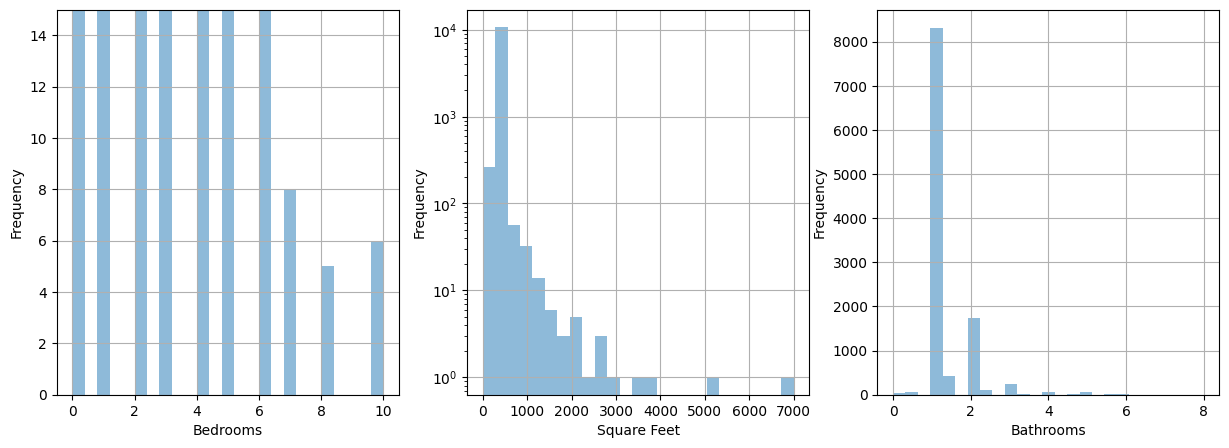

In [257]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
plt.ylim(0, 15)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
airbnb_data['Square Feet'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Square Feet')

plt.subplot(1,3,3)
airbnb_data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.show()

Una vez analizadas las variables por separado, el siguiente paso en un análisis exploratorio sería el entender las relaciones entre cada una de las variables/atributos ($\mathbf{x}$) y la variable respuesta ($y$). 

Para ello utilizaré un [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot) con la variable objetivo definida $y$ como variable dependiente, y alguna de las variables explicativas como variables independientes.

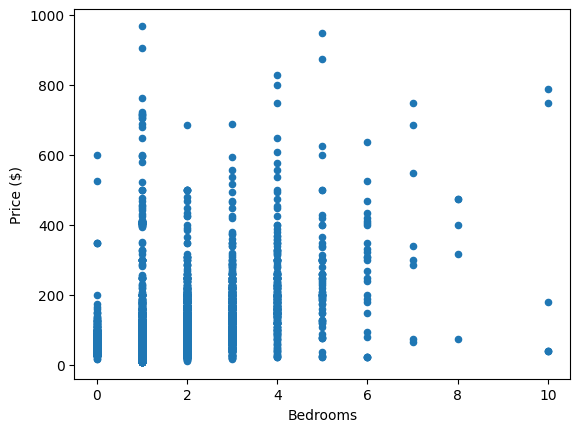

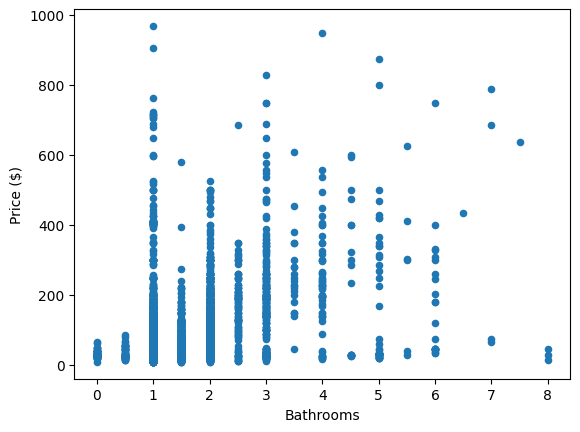

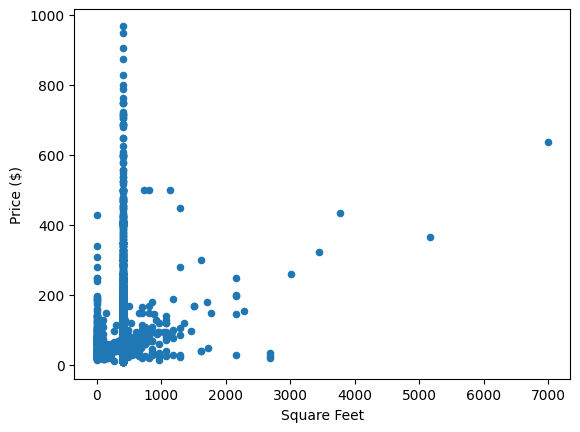

In [258]:
# Sólo representamos 3: Bedrooms, Bathrooms y Square Feet
# el resto se puede repetir una a una

airbnb_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')
plt.show()

airbnb_data.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price ($)')
plt.show()

airbnb_data.plot(kind = 'scatter',x='Square Feet',y = 'Price')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.show()

Quiero analizar aún más los datos de Square Feet, que son los que veo con más pronunciación de datos atípicos

In [259]:
airbnb_data["Square Feet"].value_counts()

Square Feet
401.845291     10639
0.000000         185
484.000000        13
646.000000        12
700.000000        11
               ...  
527.000000         1
1776.000000        1
3767.000000        1
32.000000          1
22.000000          1
Name: count, Length: 89, dtype: int64

#### Eliminación de outliers

Tanto con los scatter plot de arriba como con el análisis de `value_counts`, veo que hay unos pocos outliers en las variables Square Feet y Bedrooms. Voy a eliminarlos con filtros.

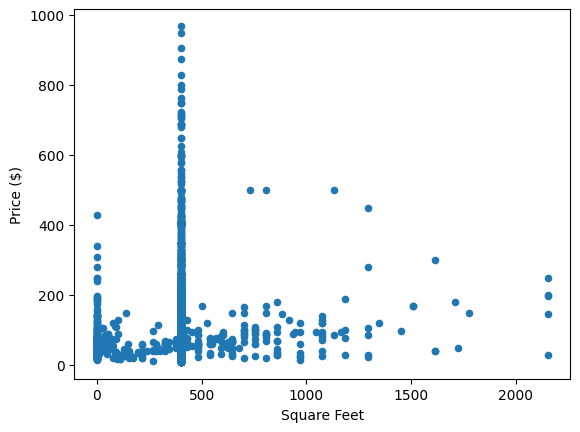

In [260]:
airbnb_data_no_outliers_square_feet = airbnb_data[airbnb_data['Square Feet'] <= 2250]

airbnb_data_no_outliers_square_feet.plot(kind = 'scatter',x='Square Feet',y = 'Price')
plt.xlabel('Square Feet')
plt.ylabel('Price ($)')
plt.show()

La gráfica tiene sentido, y el que haya ciertos datos atípicos con más pies cuadrados pero precios más bajos que otros de 500, se puede deber a ciertas variables no tenidas en cuenta como la zona (Ejemplo: La Castellana vs Carabanchel), no son la norma por lo general y pueden derivar en predicciones sesgadas de ahí que también barra datos.

In [261]:
print(
    f'Original: {airbnb_data.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_square_feet.shape[0]}\nDiferencia: {airbnb_data.shape[0] - airbnb_data_no_outliers_square_feet.shape[0]}'
)
print(f'Variación: {((airbnb_data.shape[0] - airbnb_data_no_outliers_square_feet.shape[0])/airbnb_data.shape[0])*100:2f}%')

Original: 11085 // Modificado: 11076
Diferencia: 9
Variación: 0.081191%


Es una pérdida de datos más que asumible (muy poco)

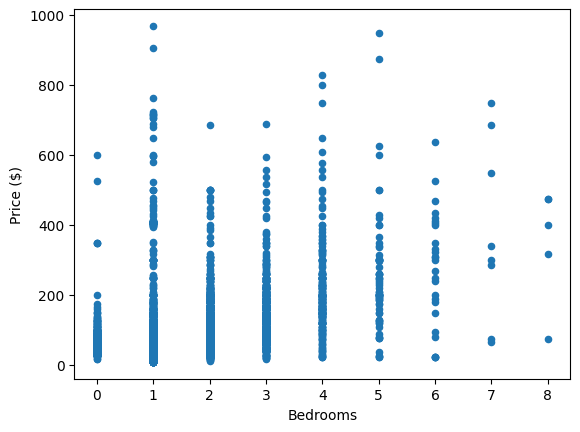

In [262]:
airbnb_data_no_outliers_bedrooms = airbnb_data[airbnb_data['Bedrooms'] <= 8]

airbnb_data_no_outliers_bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')
plt.show()

La razón por la que esta distribución no es lineal, es porque más habitaciones, no implica más precio si por ejemplo hay 2 vivienda con 1000 metros cuadrados una con 4 y otra con 8 habitaciones, pues normalmente el de 4 habitaciones las tendrá más grandes (Lo mismo me sucedía en Bathrooms) y de ahí un mayor precio.

In [263]:
print(
    f'Original: {airbnb_data.shape[0]} // '
    f'Modificado: {airbnb_data_no_outliers_bedrooms.shape[0]}\nDiferencia: {airbnb_data.shape[0] - airbnb_data_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((airbnb_data.shape[0] - airbnb_data_no_outliers_bedrooms.shape[0])/airbnb_data.shape[0])*100:2f}%')

Original: 11085 // Modificado: 11079
Diferencia: 6
Variación: 0.054127%


Como se observa es una pérdida de datos más que asumible (muy poco)

Una vez hecho un primer análisis exploratorio, el siguiente paso consiste en evaluar las correlaciones entre las diferente variables del problema. Habitualmente, esto puede servir para identificar posibles atributos que estén altamente correlacionados. 

Si la correlación entre dos atributos es muy grande, se dice que la matriz de atributos es singular, y como se vió, esto es una fuente de error importante en algunos algoritmos de machine learning, como por ejemplo en el caso de la [regresión lineal](https://es.wikipedia.org/wiki/Regresión_lineal). 

Este problema se denomina *colinealidad*. Para hacer frente a él, normalmente se evalúa [coeficiente de correlación](https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson) ($\rho$) entre las diferentes atributos de tal forma que se descartan que tengan un $\rho$ superior a un umbral que establezcamos a priori ($|\rho|>0.9$, por ejemplo). Hay que tener en cuenta que $-1<\rho<1$, de tal forma que valores próximos a $0$ indican que no hay correlación y valores próximos a $1$ o $-1$ indican una alta correlación.

La matriz de correlación se puede sacar de Pandas:

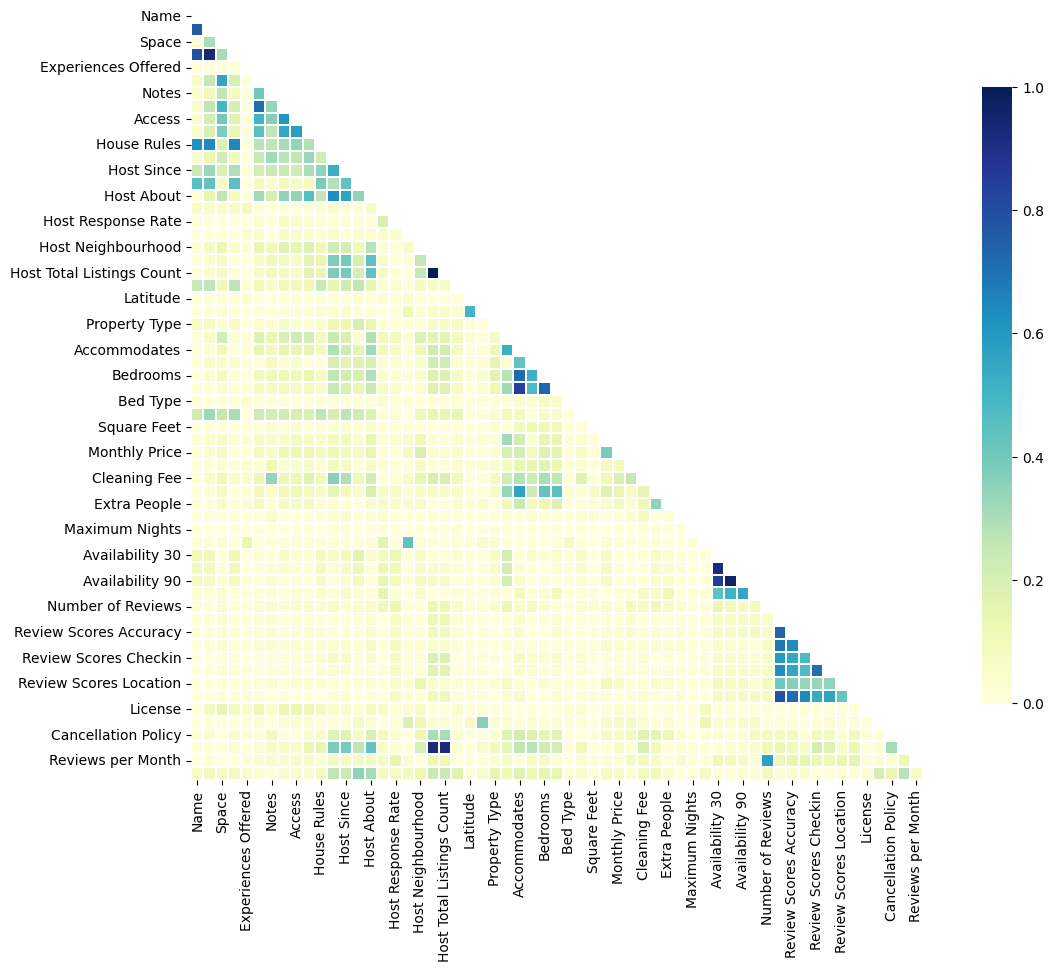

In [264]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Esa matriz de correlacción no debe incluir la columna Price porque es lo que queremos predecir y su inclusión puede sesgar los datos.

In [265]:
more_cols_to_drop = ['Space', 'Availability 30', 'Review Scores Accuracy', 
                     'Review Scores Location', 'Review Scores Checkin'] 

new_airbnb_data = airbnb_data.drop(columns=more_cols_to_drop, errors='ignore')

## 4. Generación de nuevas características
Quiero capturar la relación entre baños por pies de la vivienda y habitaciones por pies de la vivienda para evitar cuestiones ya comentadas en el punto 3. Visualización.

Adicionalmente, quiero evitar valores infinitos (Ejemplo: 1000/0 = infinito), por eso, si el denominador es 0, el resultado de esa división será 0.


In [266]:
airbnb_data['beds_per_square_feet'] = np.where(airbnb_data['Bedrooms'] != 0, 
                                                airbnb_data['Square Feet'] / airbnb_data['Bedrooms'], 0)

airbnb_data['baths_per_square_feet'] = np.where(airbnb_data['Bathrooms'] != 0, 
                                                airbnb_data['Square Feet'] / airbnb_data['Bathrooms'], 0)

## 4. Modelado, cross-validation y estudio de resultados en train y test

Ha llegado el gran momento! Antes de modelar, hay que cargar los datos de test y aplicar exactamente las mismas transformaciones. Es buena práctica, llegado este momento, combinar todo nuestro preprocesamiento en una única celda:

In [267]:
from sklearn.preprocessing import TargetEncoder
# Carga de datos
airbnb_data = pd.read_csv("airbnb-listings-extract_train.csv", delimiter=";")

# Eliminamos columnas redundante con latitude y altitude
airbnb_data = airbnb_data.drop(columns=['Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',  
                              'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 'Country', 
                              'Geolocation'])

# Imputación
numerical_mode_columns = ["Bathrooms", "Bedrooms", "Beds", "Host Listings Count", "Host Total Listings Count", 
                          "Calculated host listings count"]

for col in null_columns:
    if airbnb_data[col].dtype in ['int64', 'float64']:  
        if col in numerical_mode_columns:
            airbnb_data[col].fillna(airbnb_data[col].mode()[0], inplace=True) 
        else:
            airbnb_data[col].fillna(airbnb_data[col].mean(), inplace=True) 
    elif airbnb_data[col].dtype == 'object': 
         airbnb_data[col].fillna("", inplace=True) 

# Codificación con TargetEncoder
categorical = airbnb_data.select_dtypes(include=['object']).columns.to_list()
encoder = TargetEncoder(categories='auto', target_type='auto', smooth='auto', cv=5, shuffle=True, random_state=42)
airbnb_data[categorical] = encoder.fit_transform(airbnb_data[categorical], airbnb_data['Price'])

# Eliminamos outliers en Square Feet y Bedrooms
airbnb_data = airbnb_data[airbnb_data['Square Feet'] <= 2250]
airbnb_data = airbnb_data[airbnb_data['Bedrooms'] <= 8]

# Más columnas a eliminar
more_cols_to_drop = ['Space', 'Availability 30', 'Review Scores Accuracy', 
                     'Review Scores Location', 'Review Scores Checkin'] 

airbnb_data = airbnb_data.drop(columns=more_cols_to_drop, errors='ignore')

# Generamos características
airbnb_data['beds_per_square_feet'] = np.where(airbnb_data['Bedrooms'] != 0, 
                                                airbnb_data['Square Feet'] / airbnb_data['Bedrooms'], 0)

airbnb_data['baths_per_square_feet'] = np.where(airbnb_data['Bathrooms'] != 0, 
                                                airbnb_data['Square Feet'] / airbnb_data['Bathrooms'], 0)

Y ahora se aplica fácilmente a test:

In [268]:
# Carga de datos de test
airbnb_data_test = pd.read_csv("airbnb-listings-extract_test.csv", delimiter=";")

# Eliminamos las mismas columnas redundantes
airbnb_data_test =airbnb_data_test.drop(columns=['Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed',  
                                                  'City', 'State', 'Zipcode', 'Market', 'Smart Location', 'Country Code', 
                                                  'Country', 'Geolocation'])

# Imputación en el conjunto de test (de la misma manera que en el conjunto de train)
for col in null_columns:
    if airbnb_data_test[col].dtype in ['int64', 'float64']:  
        if col in numerical_mode_columns:
            airbnb_data_test[col].fillna(airbnb_data_test[col].mode()[0], inplace=True) 
        else:
            airbnb_data_test[col].fillna(airbnb_data_test[col].mean(), inplace=True) 
    elif airbnb_data_test[col].dtype == 'object': 
         airbnb_data_test[col].fillna("", inplace=True)

# Codificación con TargetEncoder (usando el encoder entrenado en train)
categorical = airbnb_data_test.select_dtypes(include=['object']).columns.to_list()

# Aplicamos transform sin fit para usar el encoder entrenado en train
categorical_test = [col for col in categorical if col in airbnb_data_test.columns]
airbnb_data_test[categorical_test] = encoder.transform(airbnb_data_test[categorical_test])

# Eliminamos outliers en Square Feet y Bedrooms
airbnb_data_test = airbnb_data_test[airbnb_data_test['Square Feet'] <= 2250]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Bedrooms'] <= 8]

# Más columnas a eliminar
more_cols_to_drop = ['Space', 'Availability 30', 'Review Scores Accuracy', 
                     'Review Scores Location', 'Review Scores Checkin'] 

airbnb_data_test = airbnb_data_test.drop(columns=more_cols_to_drop, errors='ignore')

# Generamos características
airbnb_data_test['beds_per_square_feet'] = np.where(airbnb_data_test['Bedrooms'] != 0, 
                                                airbnb_data_test['Square Feet'] / airbnb_data_test['Bedrooms'], 0)

airbnb_data_test['baths_per_square_feet'] = np.where(airbnb_data_test['Bathrooms'] != 0, 
                                                airbnb_data_test['Square Feet'] / airbnb_data_test['Bathrooms'], 0)

Ahora podemos preparar los datos para sklearn:

In [269]:
from sklearn import preprocessing

# Dataset de train
data_train = airbnb_data
y_train = data_train["Price"].values  # nos quedamos con la columna a predecir/objectivo price
X_train = data_train.drop(columns="Price").values # nos quedamos con el resto

# Dataset de test
data_test = airbnb_data_test
y_test = data_test["Price"].values  # nos quedamos con la columna a predecir/objectivo price
X_test = data_test.drop(columns="Price").values # nos quedamos con el resto

Y si quiero, puedo normalizar, pero con los datos de train!

In [270]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

Ahora vendría lo-de-siempre: cross validation, búsqueda de los parámetros óptimos, visualización de performance vs complejidad...

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.43

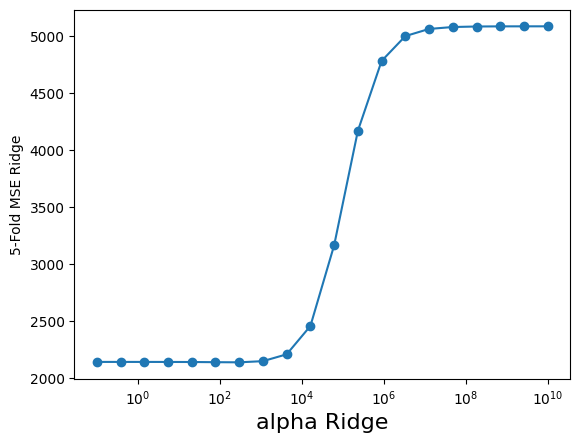

In [271]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Ridge(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha Ridge',fontsize=16)
plt.ylabel('5-Fold MSE Ridge')
plt.show()

In [272]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Obtener el mejor valor de alpha del grid search
alpha_optimo = grid.best_params_['alpha']

# Entrenar el modelo Ridge
ridge = Ridge(alpha=alpha_optimo).fit(XtrainScaled, y_train)

# Predicciones en train y test
ytrainRidge = ridge.predict(XtrainScaled)
ytestRidge = ridge.predict(XtestScaled)

# Calcular MSE y RMSE
mseTrainModelRidge = mean_squared_error(y_train, ytrainRidge)
mseTestModelRidge = mean_squared_error(y_test, ytestRidge)

print('MSE Modelo Ridge (train): %0.3g' % mseTrainModelRidge)
print('MSE Modelo Ridge (test) : %0.3g' % mseTestModelRidge)

print('RMSE Modelo Ridge (train): %0.3g' % np.sqrt(mseTrainModelRidge))
print('RMSE Modelo Ridge (test) : %0.3g' % np.sqrt(mseTestModelRidge))

# Coeficientes del modelo Ridge
feature_names = airbnb_data.columns[1:]  # Se asume que es igual en train y test
w = ridge.coef_

for f, wi in zip(feature_names, w):
    print(f, wi)

MSE Modelo Ridge (train): 2.03e+03
MSE Modelo Ridge (test) : 2.16e+03
RMSE Modelo Ridge (train): 45.1
RMSE Modelo Ridge (test) : 46.4
Summary 5.278220347819697
Description 0.843827642782202
Experiences Offered 3.265078323683606
Neighborhood Overview 2.048058787594941
Notes 0.7430053106512592
Transit 5.052259709361665
Access -1.00177533932982
Interaction 1.0172384357724198
House Rules -0.2940334795400202
Host Name 4.534834861463326
Host Since 1.336379697343726
Host Location -0.36471088117168565
Host About 12.935284562683666
Host Response Time 2.4350667501106695
Host Response Rate -4.029993099809261
Host Acceptance Rate -2.189064540007836
Host Neighbourhood 2.552199404755512
Host Listings Count 4.302046648121936
Host Total Listings Count 4.2326111348384625
Host Verifications 4.232611134838441
Latitude 2.061255495785639
Longitude 0.23341757025652604
Property Type 1.0713269141317951
Room Type -0.40419592385506714
Accommodates 9.333554936898382
Bathrooms 14.636116791255713
Bedrooms 10.48441

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.43

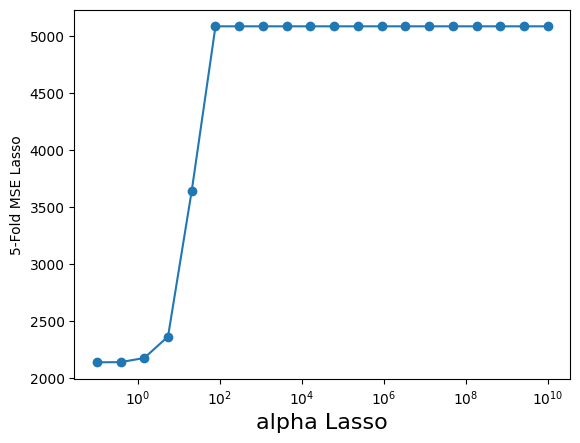

In [273]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring='neg_mean_squared_error', param_grid=param_grid, cv=5, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha Lasso',fontsize=16)
plt.ylabel('5-Fold MSE Lasso')
plt.show()

In [274]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Obtener el mejor valor de alpha del grid search
alpha_optimo = grid.best_params_['alpha']

# Entrenar el modelo Lasso
lasso = Lasso(alpha=alpha_optimo).fit(XtrainScaled, y_train)

# Predicciones en train y test
ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso = lasso.predict(XtestScaled)

# Calcular MSE y RMSE
mseTrainModelLasso = mean_squared_error(y_train, ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test, ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

# Coeficientes del modelo Lasso
feature_names = airbnb_data.columns[1:]  # Se asume que es igual en train y test
w = lasso.coef_

for f, wi in zip(feature_names, w):
    print(f, wi)


MSE Modelo Lasso (train): 2.03e+03
MSE Modelo Lasso (test) : 2.15e+03
RMSE Modelo Lasso (train): 45.1
RMSE Modelo Lasso (test) : 46.4
Summary 5.346148755285365
Description 0.004967580865556738
Experiences Offered 3.5581092216604677
Neighborhood Overview 1.9879146298212493
Notes 0.4617055462167701
Transit 5.0304238539940584
Access -0.6518970238446798
Interaction 0.8208699702350385
House Rules -0.11606274151923075
Host Name 4.755979762801847
Host Since 1.17040972462932
Host Location -0.2346803958411948
Host About 13.503127351729967
Host Response Time 2.2332785723770034
Host Response Rate -4.09480553353825
Host Acceptance Rate -2.206616462809176
Host Neighbourhood 2.420061037386974
Host Listings Count 4.205456672311966
Host Total Listings Count 10.067927428950666
Host Verifications 6.059190086337258e-15
Latitude 1.8636310048442222
Longitude 0.07076167022092479
Property Type 0.892230957748438
Room Type -0.3511374958362591
Accommodates 9.41409938414279
Bathrooms 15.977924573969048
Bedrooms 

Cogiendo como el MSE como criterio de evaluación (hay otros como generalización, etc) y habiendo abordado (o gran parte de) la generalización con cross validation, puedo observar que ambos modelos son igual de óptimos en este aspecto, si alguno de los modelos tuviese un menor MSE, pues probablemente me decantaría por ese modelo al ajustar mejor el error de la función objetivo a la recta de la función real (regresión lineal más óptima).

Personalmente, y eso se puede visualizar más fácilmente en las gráficas alphas de Ridge y Lasso, prefiero Ridge debido a que Lasso tiende a hacer selección de variables (algunos coeficientes se vuelven cero), mientras que Ridge distribuye los pesos sin anularlos.

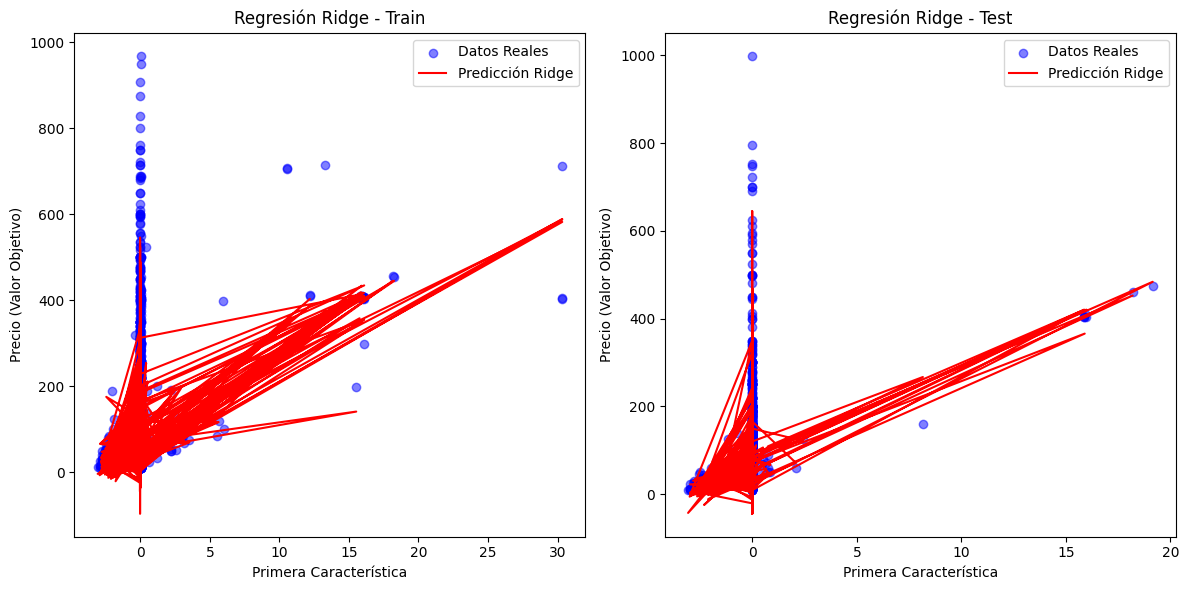

In [275]:
import matplotlib.pyplot as plt

# Graficar los resultados de la regresión Ridge en train y test
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train
axes[0].scatter(XtrainScaled[:, 0], y_train, color='blue', alpha=0.5, label='Datos Reales')
axes[0].plot(XtrainScaled[:, 0], ridge.predict(XtrainScaled), color='red', label='Predicción Ridge')
axes[0].set_xlabel("Primera Característica")
axes[0].set_ylabel("Precio (Valor Objetivo)")
axes[0].set_title("Regresión Ridge - Train")
axes[0].legend()

# Test
axes[1].scatter(XtestScaled[:, 0], y_test, color='blue', alpha=0.5, label='Datos Reales')
axes[1].plot(XtestScaled[:, 0], ridge.predict(XtestScaled), color='red', label='Predicción Ridge')
axes[1].set_xlabel("Primera Característica")
axes[1].set_ylabel("Precio (Valor Objetivo)")
axes[1].set_title("Regresión Ridge - Test")
axes[1].legend()

plt.tight_layout()  # Ajustar espaciado
plt.show()


variable = columna = característica

El gráfico de la izquierda muestra cómo se comporta el modelo de regresión Ridge con los datos de entrenamiento, lo que permite evaluar qué tan bien se ajusta a los datos ya vistos. Como se observa, al tomar una única característica, el modelo muestra una buena capacidad de ajuste.

El gráfico de la derecha muestra el comportamiento del modelo con los datos de prueba (test), permitiendo evaluar su capacidad de generalización a datos no vistos durante el entrenamiento. Al tomar la misma característica, se observa un ajuste similar.

No hay diferencias evidentes entre ambos gráficos, lo que indica que el modelo no está sobreajustando y es capaz de capturar la tendencia general de los datos.


No obstante, hay un problema con este análisis, y es que se basa en una única característica para evaluar la predicción del precio. Sin embargo, en este caso se están utilizando unas 60 variables (creo). Evaluarlas individualmente sería poco práctico, por lo que se necesita una métrica más global para evaluar el desempeño del modelo.

Para ello voy a cambiar la gráfica para que, en lugar de usar solo una característica (X[:, 0]), ahora se comparen los valores reales vs. los predichos en ambas fases (train y test). Esto es más útil cuando se tienen muchas características porque muestra si el modelo está ajustando bien o si hay sesgo o varianza.

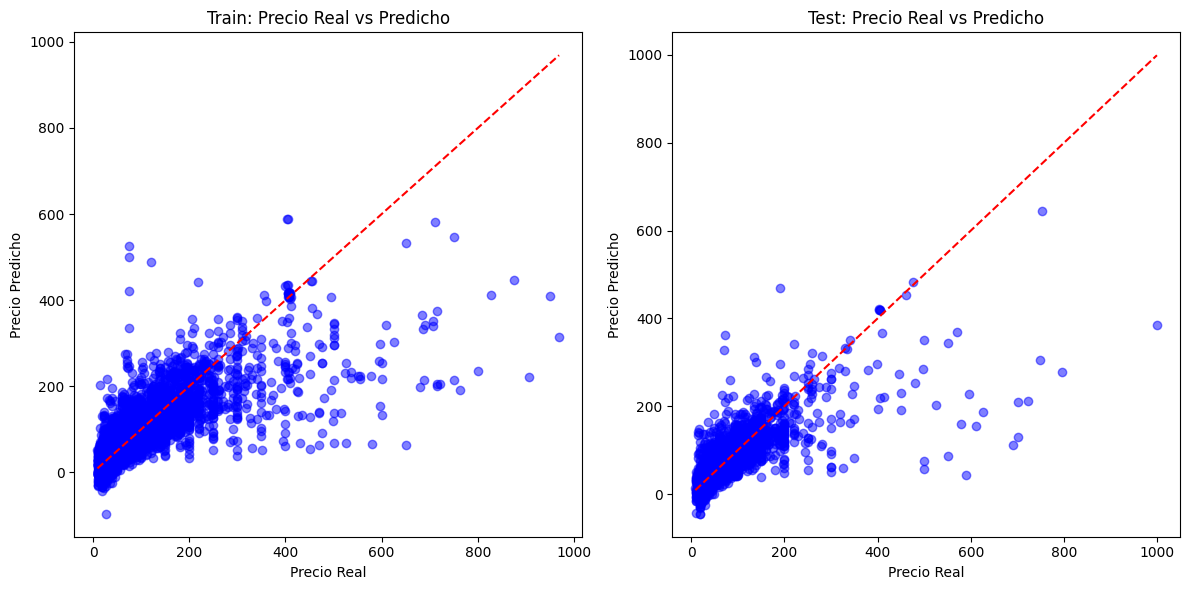

In [276]:
# Graficar los valores reales vs. predichos en train y test
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Train
axes[0].scatter(y_train, ytrainRidge, color='blue', alpha=0.5)
axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
axes[0].set_xlabel("Precio Real")
axes[0].set_ylabel("Precio Predicho")
axes[0].set_title("Train: Precio Real vs Predicho")

# Test
axes[1].scatter(y_test, ytestRidge, color='blue', alpha=0.5)
axes[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
axes[1].set_xlabel("Precio Real")
axes[1].set_ylabel("Precio Predicho")
axes[1].set_title("Test: Precio Real vs Predicho")

plt.tight_layout()
plt.show()

Se observa una correlación positiva: a medida que el precio real aumenta, también lo hace el precio predicho.
Sin embargo, hay una dispersión considerable, lo que indica que el modelo no predice con total precisión. Esto es dado que el análisis y el preprocesamiento no ha sido perfecto y se podría machacar aún más a expensas de un tiempo extra que quizás no compensa...

En general, parece que el modelo tiene cierta capacidad predictiva, pero aún hay ciertos errores significativos en algunos casos (dispersiones considerables = el modelo no predice con total precisión. , ni en train (datos bases) ni en test (datos nuevos))